In [2]:
# Import necessary libraries
import numpy as np    # For numerical operations and random data generation
import pandas as pd   # For handling tabular data using DataFrames
import matplotlib.pyplot as plt # For creating plots
import seaborn as sns # For enhanced statistical visualizations
from scipy.stats import mode, skew, kurtosis  # For statistical calculations: mode, skewness, kurtosis


In [3]:
# 1. Simulate sample data: 1000 values from a normal distribution with mean=50 and std=15
np.random.seed(42) # For reproducibility
data = np.random.normal(loc=50, scale=15, size=1000)

# Convert data to a DataFrame for easier analysis
df = pd.DataFrame(data, columns=["Scores"])


In [4]:
# 2. Measures of Central Tendency
mean_val = df["Scores"].mean()   # Calculate mean
median_val = df["Scores"].median()   # Calculate median
mode_val = mode(df["Scores"], keepdims=True).mode[0]  # Calculate mode (most frequent value)

# Print results for central tendency
print("Measures of Central Tendency")
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")


Measures of Central Tendency
Mean: 50.29
Median: 50.38
Mode: 1.38


In [5]:
# 3. Measures of Dispersion
range_val = df["Scores"].max() - df["Scores"].min()   # Calculate range (max - min)
variance_val = df["Scores"].var()   # Calculate variance
std_dev_val = df["Scores"].std()    # Calculate standard deviation
iqr_val = df["Scores"].quantile(0.75) - df["Scores"].quantile(0.25)  # Calculate IQR (Interquartile Range)

# Print results for dispersion
print("\nMeasures of Dispersion")
print(f"Range: {range_val:.2f}")
print(f"Variance: {variance_val:.2f}")
print(f"Standard Deviation: {std_dev_val:.2f}")
print(f"Interquartile Range (IQR): {iqr_val:.2f}")



Measures of Dispersion
Range: 106.41
Variance: 215.74
Standard Deviation: 14.69
Interquartile Range (IQR): 19.43


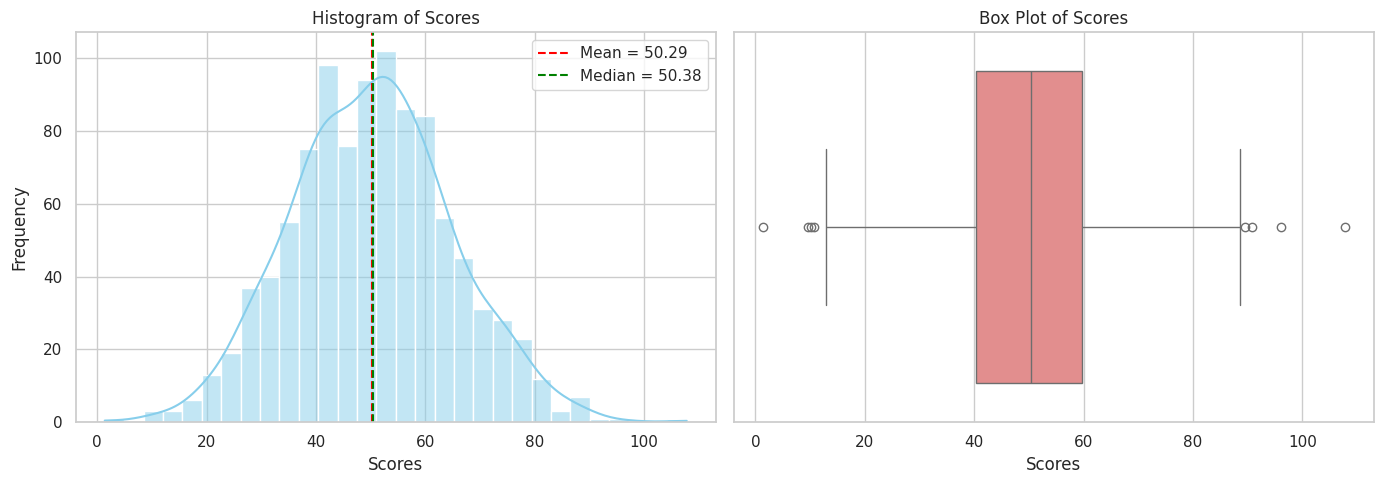

In [6]:
# 4. Data Distribution Visualization
plt.figure(figsize=(14, 5)) # Create a wide figure for two plots side by side

# Histogram
plt.subplot(1, 2, 1)    # First subplot (left)
sns.histplot(df["Scores"], bins=30, kde=True, color="skyblue")  # Histogram with KDE curve
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')     # Red line for mean
plt.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}')  # Green line for median
plt.title("Histogram of Scores")    # Plot title
plt.xlabel("Scores")    # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.legend()      # Show legend

# Box Plot
plt.subplot(1, 2, 2)   # Second subplot (right)
sns.boxplot(x=df["Scores"], color="lightcoral")  # Box plot
plt.title("Box Plot of Scores")   # Plot title
plt.xlabel("Scores")  # X-axis label

# Display the plots
plt.tight_layout()   # Adjust layout to prevent overlap
plt.show()


In [7]:
# 5. Skewness and Kurtosis (Shape of Distribution)
skew_val = skew(df["Scores"])             # Compute skewness (asymmetry)
kurtosis_val = kurtosis(df["Scores"])     # Compute kurtosis (peakedness), excess kurtosis

# Print results for skewness and kurtosis
print("\nData Distribution Shape")
print(f"Skewness: {skew_val:.2f} {'(Right-skewed)' if skew_val > 0 else '(Left-skewed)' if skew_val < 0 else '(Symmetric)'}")
print(f"Kurtosis: {kurtosis_val:.2f} {'(Leptokurtic)' if kurtosis_val > 0 else '(Platykurtic)' if kurtosis_val < 0 else '(Mesokurtic)'}")



Data Distribution Shape
Skewness: 0.12 (Right-skewed)
Kurtosis: 0.07 (Leptokurtic)


In [8]:
# Create a summary DataFrame for all statistics
summary_stats = pd.DataFrame({
           "Mean": [mean_val],
           "Median": [median_val],
           "Mode": [mode_val],
           "Range": [range_val],
           "Variance": [variance_val],
           "Std Dev": [std_dev_val],
           "IQR": [iqr_val],
           "Skewness": [skew_val],
           "Kurtosis": [kurtosis_val]
})

print("\nSummary Statistics Table:")
display(summary_stats)



Summary Statistics Table:


,Mean,Median,Mode,Range,Variance,Std Dev,IQR,Skewness,Kurtosis
0,50.289981,50.379509,1.38099,106.409982,215.744367,14.688239,19.433013,0.116801,0.066206


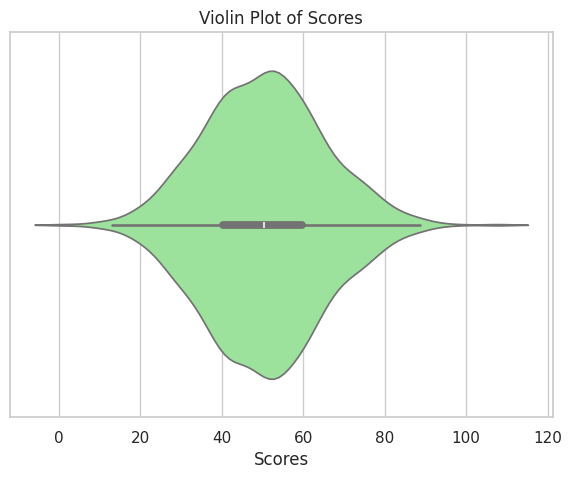

In [9]:
# Violin Plot: combines boxplot and KDE
plt.figure(figsize=(7, 5))
sns.violinplot(x=df["Scores"], color="lightgreen")
plt.title("Violin Plot of Scores")
plt.xlabel("Scores")
plt.show()


In [10]:
# Save summary to CSV (optional)
summary_stats.to_csv("summary_statistics.csv", index=False)


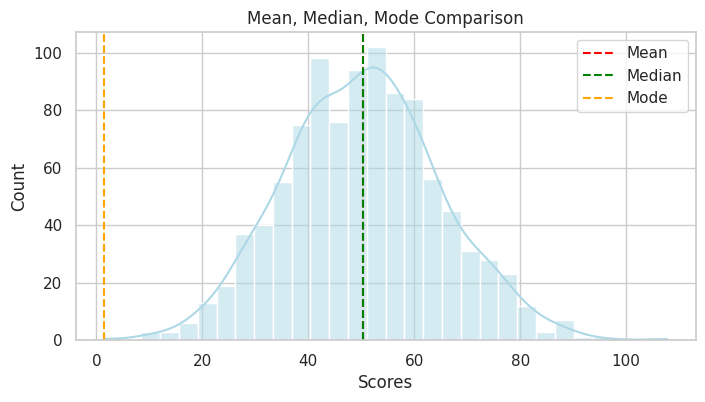

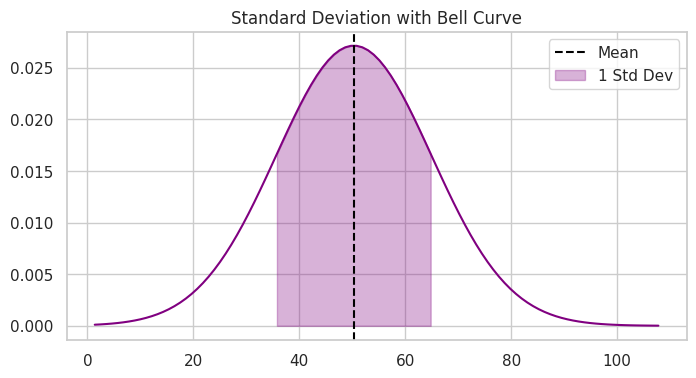

In [12]:
# 6. Additional Visualizations
from scipy.stats import mode, skew, kurtosis, norm

# Mean, Median, Mode Comparison
plt.figure(figsize=(8, 4))
sns.histplot(df["Scores"], bins=30, kde=True, color="lightblue")
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='green', linestyle='--', label='Median')
plt.axvline(mode_val, color='orange', linestyle='--', label='Mode')
plt.title("Mean, Median, Mode Comparison")
plt.legend()
plt.show()

# Standard Deviation with Bell Curve
x = np.linspace(df["Scores"].min(), df["Scores"].max(), 100)
y = norm.pdf(x, mean_val, std_dev_val)
plt.figure(figsize=(8, 4))
plt.plot(x, y, color='purple')
plt.axvline(mean_val, color='black', linestyle='--', label='Mean')
plt.fill_between(x, y, where=((x > mean_val - std_dev_val) & (x < mean_val + std_dev_val)), color='purple', alpha=0.3, label='1 Std Dev')
plt.title("Standard Deviation with Bell Curve")
plt.legend()
plt.show()


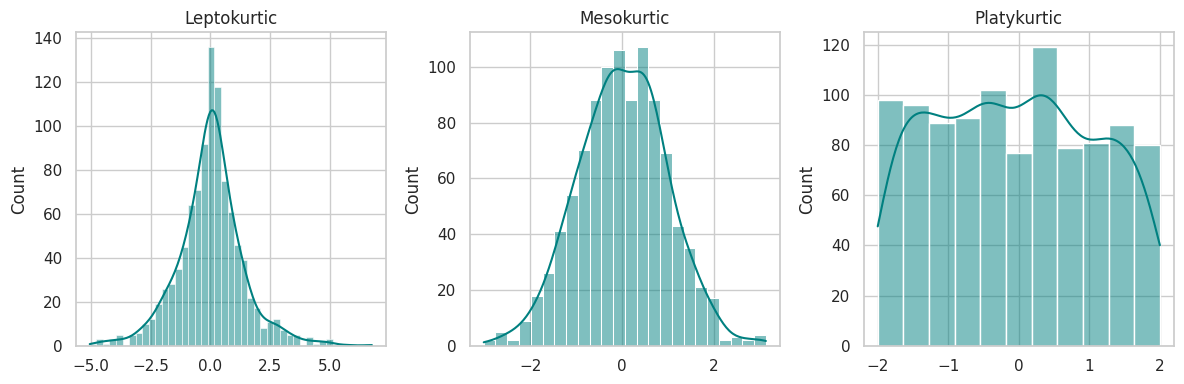

In [13]:
# Kurtosis Comparison
plt.figure(figsize=(12, 4))
for i, k_type in enumerate(['leptokurtic', 'mesokurtic', 'platykurtic']):
      plt.subplot(1, 3, i+1)
      if k_type == 'leptokurtic':
          data_k = np.random.laplace(loc=0, scale=1, size=1000)
      elif k_type == 'mesokurtic':
          data_k = np.random.normal(loc=0, scale=1, size=1000)
      else:
          data_k = np.random.uniform(low=-2, high=2, size=1000)
      sns.histplot(data_k, kde=True, color='teal')
      plt.title(k_type.capitalize())
plt.tight_layout()
plt.show()


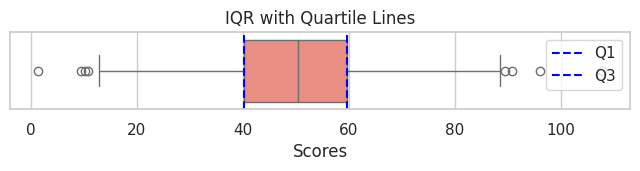

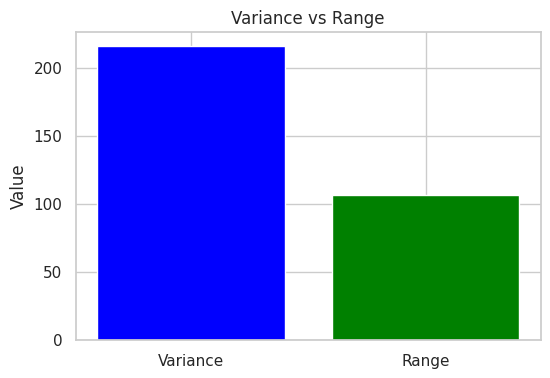

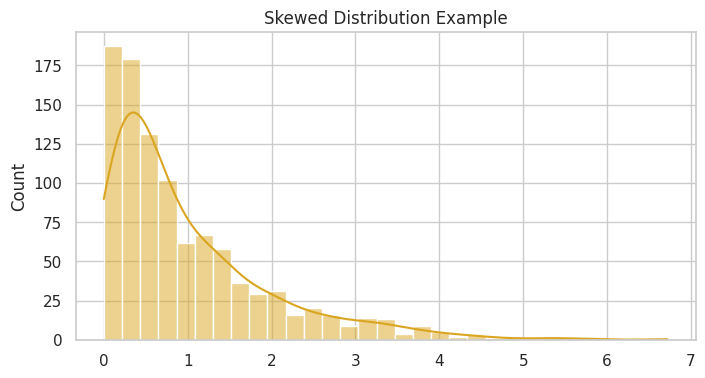

In [14]:
# IQR Illustration with Quartile Lines
plt.figure(figsize=(8, 1))
sns.boxplot(x=df["Scores"], color="salmon")
q1 = df["Scores"].quantile(0.25)
q3 = df["Scores"].quantile(0.75)
plt.axvline(q1, color='blue', linestyle='--', label='Q1')
plt.axvline(q3, color='blue', linestyle='--', label='Q3')
plt.title("IQR with Quartile Lines")
plt.legend()
plt.show()

# Variance vs Range (Bar Chart)
plt.figure(figsize=(6, 4))
plt.bar(['Variance', 'Range'], [variance_val, range_val], color=['blue', 'green'])
plt.title("Variance vs Range")
plt.ylabel("Value")
plt.show()

# Skewed Distribution Example
skewed_data = np.random.exponential(scale=1.0, size=1000)
plt.figure(figsize=(8, 4))
sns.histplot(skewed_data, kde=True, color='goldenrod')
plt.title("Skewed Distribution Example")
plt.show()
